In [2]:
import yfinance as yf
import pandas as pd
import datetime

assets = ['AAPL','AMZN','MSFT','TSLA','GOOGL'] #TECH STOCKS
start_date = '2015-01-01'
end_date = '2022-01-01'

data = yf.download(assets,start=start_date,end=end_date)['Close']
print(data.head())

returns = data.pct_change()
print(returns.head().dropna())

returns = returns.dropna()
print(returns.head())
avg_returns = returns.mean()
print("Expected returns : \n",avg_returns)

risk = returns.std()
print("Risk (Standard deviation) :\n ",risk)



import cvxpy as cp
import numpy as np

n = len(assets)

weights = cp.Variable(n)

portfolio_returns = cp.sum(cp.multiply(avg_returns,weights))
cov_matrix = np.cov(returns.T)

cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Make the matrix symmetric

portfolio_risk = cp.quad_form(weights, cov_matrix)

target_risk = 0.02 #define risk

#define the constraints and the objectives
constraints = [cp.sum(weights) == 1, portfolio_risk <= target_risk, weights >=0]

#this is to minimize the risk in portfolio
objective = cp.Minimize(portfolio_risk)

problem = cp.Problem(objective=objective, constraints=constraints)
problem.solve()

optimal_weights = weights.value
print("Optimal Weights:", optimal_weights)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker           AAPL     AMZN      GOOGL       MSFT       TSLA
Date                                                           
2015-01-02  24.320433  15.4260  26.351515  40.072132  14.620667
2015-01-05  23.635283  15.1095  25.849415  39.703636  14.006000
2015-01-06  23.637510  14.7645  25.211468  39.120892  14.085333
2015-01-07  23.968964  14.9210  25.137320  39.617935  14.063333
2015-01-08  24.889908  15.0230  25.224905  40.783405  14.041333
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2015-01-05 -0.028172 -0.020517 -0.019054 -0.009196 -0.042041
2015-01-06  0.000094 -0.022833 -0.024679 -0.014677  0.005664
2015-01-07  0.014022  0.010600 -0.002941  0.012705 -0.001562
2015-01-08  0.038422  0.006836  0.003484  0.029418 -0.001564
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2015-01-05 -0.028172 -0.020517 -0.019054 -0.009196 -0.042041
201

In [3]:
import yfinance as yf
import pandas as pd
import datetime

assets = ['AAPL','AMZN','MSFT','TSLA','GOOGL'] #TECH STOCKS
start_date = '2015-01-01'
end_date = '2022-01-01'

data = yf.download(assets,start=start_date,end=end_date)['Close']
print(data.head())

returns = data.pct_change()
print(returns.head().dropna())

returns = returns.dropna()
print(returns.head())
avg_returns = returns.mean()
print("Expected returns : \n",avg_returns)

risk = returns.std()
print("Risk (Standard deviation) :\n ",risk)




import cvxpy as cp
import numpy as np

n = len(assets)

weights = cp.Variable(n)

portfolio_returns = cp.sum(cp.multiply(avg_returns,weights))
cov_matrix = np.cov(returns.T)

cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Make the matrix symmetric

portfolio_risk = cp.quad_form(weights, cov_matrix)

target_risk = 0.02 #define risk

#define the constraints and the objectives
constraints = [cp.sum(weights) == 1, portfolio_risk <= target_risk, weights >=0]

#this is to maximize the returns
objective = cp.Maximize(portfolio_returns)

problem = cp.Problem(objective=objective, constraints=constraints)
problem.solve()

optimal_weights = weights.value
print("Optimal Weights:", optimal_weights)

[*********************100%***********************]  5 of 5 completed

Ticker           AAPL     AMZN      GOOGL       MSFT       TSLA
Date                                                           
2015-01-02  24.320433  15.4260  26.351515  40.072132  14.620667
2015-01-05  23.635283  15.1095  25.849415  39.703636  14.006000
2015-01-06  23.637510  14.7645  25.211468  39.120892  14.085333
2015-01-07  23.968964  14.9210  25.137320  39.617935  14.063333
2015-01-08  24.889908  15.0230  25.224905  40.783405  14.041333
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2015-01-05 -0.028172 -0.020517 -0.019054 -0.009196 -0.042041
2015-01-06  0.000094 -0.022833 -0.024679 -0.014677  0.005664
2015-01-07  0.014022  0.010600 -0.002941  0.012705 -0.001562
2015-01-08  0.038422  0.006836  0.003484  0.029418 -0.001564
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2015-01-05 -0.028172 -0.020517 -0.019054 -0.009196 -0.042041
201

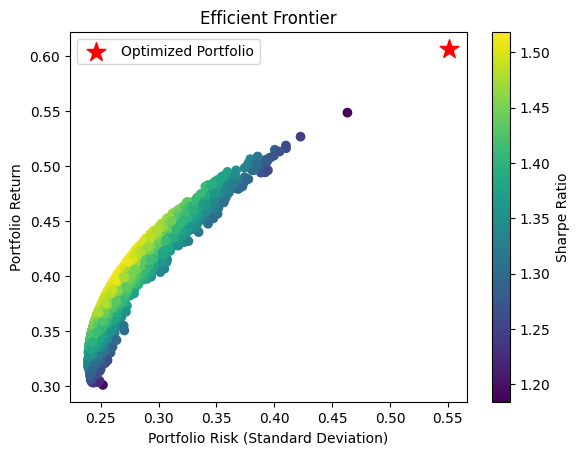

In [4]:
import matplotlib.pyplot as plt

# Generate random portfolios to simulate the Efficient Frontier
n_portfolios = 10000
portfolio_returns = []
portfolio_risks = []
portfolio_weights = []

# Daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

# Annualize
mean_annual_returns = mean_daily_returns * 252
annual_cov_matrix = cov_matrix * 252


for _ in range(n_portfolios):
    # Generate random weights
    random_weights = np.random.random(n)
    random_weights /= np.sum(random_weights)

    # Calculate portfolio return and risk
    random_return = np.dot(random_weights, mean_annual_returns)
    random_risk = np.sqrt(np.dot(random_weights.T, np.dot(annual_cov_matrix, random_weights)))

    portfolio_returns.append(random_return)
    portfolio_risks.append(random_risk)
    portfolio_weights.append(random_weights)

# Plot the Efficient Frontier
plt.scatter(portfolio_risks, portfolio_returns, c=np.array(portfolio_returns) / np.array(portfolio_risks), cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')

# Plot the optimized portfolio
#extract the numerical value of portfolio_risk taking square root as this is variance to get standard deviation
#optimized_portfolio_risk = portfolio_risk.value ** 0.5

optimized_portfolio_return = np.dot(optimal_weights, mean_annual_returns)
optimized_portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(annual_cov_matrix, optimal_weights)))

# Plot the optimized portfolio
plt.scatter(optimized_portfolio_risk, optimized_portfolio_return, marker='*', color='r', s=200, label="Optimized Portfolio")
plt.legend(loc="upper left")

plt.savefig('efficient_frontier.png', dpi=300, bbox_inches='tight')
plt.show()

#return of optimised portfolio using optimal weights and average returns
#3optimized_portfolio_return = np.dot(optimal_weights, avg_returns)

# Plot the optimized portfolio
#plt.scatter(optimized_portfolio_risk, optimized_portfolio_risk, marker='*', color='r', s=200, label="Optimized Portfolio")
#plt.legend(loc="upper left")

#plt.show()
